In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df =pd.read_csv('BankChurners.csv')

In [3]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [4]:
df.shape

(10127, 23)

In [5]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [6]:
df.drop(['CLIENTNUM','Attrition_Flag','Contacts_Count_12_mon',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True, axis=1)

In [7]:
df

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0                45      M                3     High School        Married   
1                49      F                5        Graduate         Single   
2                51      M                3        Graduate        Married   
3                40      F                4     High School        Unknown   
4                40      M                3      Uneducated        Married   
...             ...    ...              ...             ...            ...   
10122            50      M                2        Graduate         Single   
10123            41      M                2         Unknown       Divorced   
10124            44      F                1     High School        Married   
10125            30      M                2        Graduate        Unknown   
10126            43      F                2        Graduate        Married   

      Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0         $60K - $80K          Blue              39                         5   
1      Less than $40K          Blue              44                         6   
2        $80K - $120K          Blue              36                         4   
3      Less than $40K          Blue              34                         3   
4         $60K - $80K          Blue              21                         5   
...               ...           ...             ...                       ...   
10122     $40K - $60K          Blue              40                         3   
10123     $40K - $60K          Blue              25                         4   
10124  Less than $40K          Blue              36                         5   
10125     $40K - $60K          Blue              36                         4   
10126  Less than $40K        Silver              25                         6   

       Months_Inactive_12_mon  Credit_Limit  Total_Revolving_Bal  
0                           1       12691.0                  777  
1                           1        8256.0                  864  
2                           1        3418.0                    0  
3                           4        3313.0                 2517  
4                           1        4716.0                    0  
...                       ...           ...                  ...  
10122                       2        4003.0                 1851  
10123                       2        4277.0                 2186  
10124                       3        5409.0                    0  
10125                       3        5281.0                    0  
10126                       2       10388.0                 1961  

[10127 rows x 12 columns]

# Null Treatment for Columns that has Unknown Value

In [8]:
df.Education_Level.value_counts().sort_values()

Doctorate         451
Post-Graduate     516
College          1013
Uneducated       1487
Unknown          1519
High School      2013
Graduate         3128
Name: Education_Level, dtype: int64

In [9]:
df.Marital_Status.value_counts().sort_values()

Divorced     748
Unknown      749
Single      3943
Married     4687
Name: Marital_Status, dtype: int64

In [10]:
df.Income_Category.value_counts().sort_values()

$120K +            727
Unknown           1112
$60K - $80K       1402
$80K - $120K      1535
$40K - $60K       1790
Less than $40K    3561
Name: Income_Category, dtype: int64

In [11]:
df.Card_Category.value_counts().sort_values()

Platinum      20
Gold         116
Silver       555
Blue        9436
Name: Card_Category, dtype: int64

In [12]:
edu = df['Education_Level'].mode()
mar = df['Marital_Status'].mode()
inc = df['Income_Category'].mode()

print(edu)
print(mar)
print(inc)

0    Graduate
Name: Education_Level, dtype: object
0    Married
Name: Marital_Status, dtype: object
0    Less than $40K
Name: Income_Category, dtype: object


In [13]:
df['Education_Level'] = df['Education_Level'].replace('Unknown','Graduate')
df.Education_Level.unique()

array(['High School', 'Graduate', 'Uneducated', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [14]:
df['Marital_Status'] = df['Marital_Status'].replace('Unknown','Married')
df.Marital_Status.unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [15]:
df['Income_Category'] = df['Income_Category'].replace('Unknown','Less than $40K')
df.Income_Category.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +'], dtype=object)

In [16]:
df.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Credit_Limit                0
Total_Revolving_Bal         0
dtype: int64

# Outlier Treatment

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


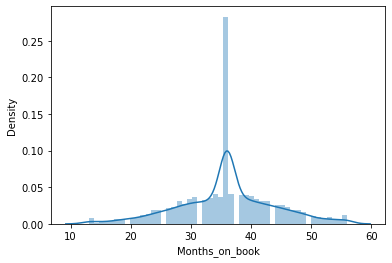

In [17]:
sn.distplot(df.Months_on_book)
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


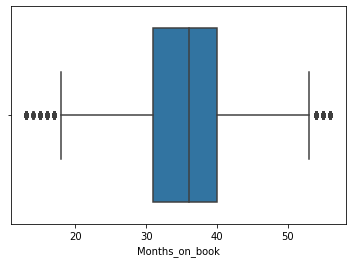

In [18]:
sn.boxplot(df.Months_on_book)
plt.show()

In [19]:
df.Months_on_book.mean()

35.928409203120374

In [20]:
df.Months_on_book.std()

7.986416330871776

In [21]:
#Standard Deviation Method or 3-Sigma Limits 
m=np.mean(df.Months_on_book)
s=np.std(df.Months_on_book)
print('Mean Net Worth: ',m)
print('Standard Deviation: ',s)
lowerlim=max(0,m-3*s) #max function will set the cap for the lower limit to make sure it does not go below 0
upperlim=m+3*s
print('Lower Limit: ',lowerlim)
print('Upper Limit: ',upperlim)

Mean Net Worth:  35.928409203120374
Standard Deviation:  7.98602200809617
Lower Limit:  11.970343178831865
Upper Limit:  59.88647522740888


In [22]:
#outlier detection
df[(df.Months_on_book <lowerlim) | (df.Months_on_book > upperlim)]

Empty DataFrame
Columns: [Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Credit_Limit, Total_Revolving_Bal]
Index: []

In [23]:
nwdf_cleaned=df[(df.Months_on_book >=lowerlim) & (df.Months_on_book <=upperlim)]
nwdf_cleaned.describe(include='all')

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
count   10127.000000  10127     10127.000000           10127          10127   
unique           NaN      2              NaN               6              3   
top              NaN      F              NaN        Graduate        Married   
freq             NaN   5358              NaN            4647           5436   
mean       46.325960    NaN         2.346203             NaN            NaN   
std         8.016814    NaN         1.298908             NaN            NaN   
min        26.000000    NaN         0.000000             NaN            NaN   
25%        41.000000    NaN         1.000000             NaN            NaN   
50%        46.000000    NaN         2.000000             NaN            NaN   
75%        52.000000    NaN         3.000000             NaN            NaN   
max        73.000000    NaN         5.000000             NaN            NaN   

       Income_Category Card_Category  Months_on_book  \
count            10127         10127    10127.000000   
unique               5             4             NaN   
top     Less than $40K          Blue             NaN   
freq              4673          9436             NaN   
mean               NaN           NaN       35.928409   
std                NaN           NaN        7.986416   
min                NaN           NaN       13.000000   
25%                NaN           NaN       31.000000   
50%                NaN           NaN       36.000000   
75%                NaN           NaN       40.000000   
max                NaN           NaN       56.000000   

        Total_Relationship_Count  Months_Inactive_12_mon  Credit_Limit  \
count               10127.000000            10127.000000  10127.000000   
unique                       NaN                     NaN           NaN   
top                          NaN                     NaN           NaN   
freq                         NaN                     NaN           NaN   
mean                    3.812580                2.341167   8631.953698   
std                     1.554408                1.010622   9088.776650   
min                     1.000000                0.000000   1438.300000   
25%                     3.000000                2.000000   2555.000000   
50%                     4.000000                2.000000   4549.000000   
75%                     5.000000                3.000000  11067.500000   
max                     6.000000                6.000000  34516.000000   

        Total_Revolving_Bal  
count          10127.000000  
unique                  NaN  
top                     NaN  
freq                    NaN  
mean            1162.814061  
std              814.987335  
min                0.000000  
25%              359.000000  
50%             1276.000000  
75%             1784.000000  
max             2517.000000

In [24]:
nwdf_cleaned.Months_on_book.std()

7.986416330871776

**Looking at the standard deviation of the Months on Book, we see that it does not change anything , confirming that data point we explored was not skewing our data.**

# Cleaned Dataset

In [25]:
df.to_csv('final_df_BankChurners.csv')
dfcleaned = pd.read_csv ('final_df_BankChurners.csv')
dfcleaned.head()

Unnamed: 0  Customer_Age Gender  Dependent_count Education_Level  \
0           0            45      M                3     High School   
1           1            49      F                5        Graduate   
2           2            51      M                3        Graduate   
3           3            40      F                4     High School   
4           4            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Married  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Credit_Limit  \
0                         5                       1       12691.0   
1                         6                       1        8256.0   
2                         4                       1        3418.0   
3                         3                       4        3313.0   
4                         5                       1        4716.0   

   Total_Revolving_Bal  
0                  777  
1                  864  
2                    0  
3                 2517  
4                    0

In [26]:
data=pd.read_csv('final_df_BankChurners.csv')

In [27]:
data.drop(columns=['Unnamed: 0'],inplace=True)
data.head()

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0            45      M                3     High School        Married   
1            49      F                5        Graduate         Single   
2            51      M                3        Graduate        Married   
3            40      F                4     High School        Married   
4            40      M                3      Uneducated        Married   

  Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0     $60K - $80K          Blue              39                         5   
1  Less than $40K          Blue              44                         6   
2    $80K - $120K          Blue              36                         4   
3  Less than $40K          Blue              34                         3   
4     $60K - $80K          Blue              21                         5   

   Months_Inactive_12_mon  Credit_Limit  Total_Revolving_Bal  
0                       1       12691.0                  777  
1                       1        8256.0                  864  
2                       1        3418.0                    0  
3                       4        3313.0                 2517  
4                       1        4716.0                    0

In [28]:
data = data.reindex(columns = [col for col in data.columns if col != 'Months_on_book'] + ['Months_on_book'])
data

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0                45      M                3     High School        Married   
1                49      F                5        Graduate         Single   
2                51      M                3        Graduate        Married   
3                40      F                4     High School        Married   
4                40      M                3      Uneducated        Married   
...             ...    ...              ...             ...            ...   
10122            50      M                2        Graduate         Single   
10123            41      M                2        Graduate       Divorced   
10124            44      F                1     High School        Married   
10125            30      M                2        Graduate        Married   
10126            43      F                2        Graduate        Married   

      Income_Category Card_Category  Total_Relationship_Count  \
0         $60K - $80K          Blue                         5   
1      Less than $40K          Blue                         6   
2        $80K - $120K          Blue                         4   
3      Less than $40K          Blue                         3   
4         $60K - $80K          Blue                         5   
...               ...           ...                       ...   
10122     $40K - $60K          Blue                         3   
10123     $40K - $60K          Blue                         4   
10124  Less than $40K          Blue                         5   
10125     $40K - $60K          Blue                         4   
10126  Less than $40K        Silver                         6   

       Months_Inactive_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                           1       12691.0                  777   
1                           1        8256.0                  864   
2                           1        3418.0                    0   
3                           4        3313.0                 2517   
4                           1        4716.0                    0   
...                       ...           ...                  ...   
10122                       2        4003.0                 1851   
10123                       2        4277.0                 2186   
10124                       3        5409.0                    0   
10125                       3        5281.0                    0   
10126                       2       10388.0                 1961   

       Months_on_book  
0                  39  
1                  44  
2                  36  
3                  34  
4                  21  
...               ...  
10122              40  
10123              25  
10124              36  
10125              36  
10126              25  

[10127 rows x 12 columns]

# Pandas Profiling

In [29]:
import pandas_profiling as pp
from pandas import DataFrame
profile=pp.ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<function matplotlib.pyplot.show(close=None, block=None)>

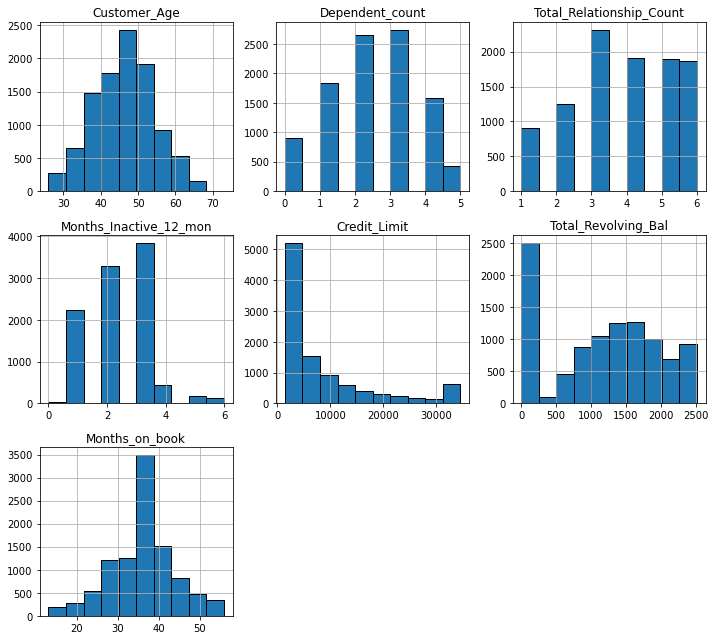

In [30]:
data.hist(figsize=(10,9), ec="k")
plt.title('Raw Credit Card Data')
plt.tight_layout()
plt.show

In [31]:
# Model
x = data.drop(columns='Months_on_book')
y = data['Months_on_book']

# Split Data to Train and Test Dataset

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [34]:
ohe = OneHotEncoder()
ohe.fit(x[['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Gender']])

OneHotEncoder()

In [35]:
ohe.categories_

[array(['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
        'Uneducated'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
        'Less than $40K'], dtype=object),
 array(['Blue', 'Gold', 'Platinum', 'Silver'], dtype=object),
 array(['F', 'M'], dtype=object)]

In [36]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),
['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Gender']), remainder ='passthrough')

In [37]:
lr=LinearRegression()

In [38]:
pipe=make_pipeline(column_trans,lr)

In [39]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated'], dtype=object),
                                                                            array(['Divorced', 'Married', 'Single'], dtype=object),
                                                                            array(['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K'], dtype=object),
                                                                            array(['Blue', 'Gold', 'Platinum', 'Silver'], dtype=object),
                                                                            array(['F', 'M'], dtype=object)]),
                                                  ['Education_Level',
                

In [40]:
y_pred = pipe.predict(x_test)

In [41]:
r2_score(y_test,y_pred)

0.6299303179437223

In [42]:
data.shape

(10127, 12)

In [43]:
scores=[]
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [44]:
np.argmax(scores)

87

In [45]:
scores[np.argmax(scores)]

0.6515479990571089

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 24)
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
r2_score(y_test,y_pred)

0.6106606899465608

 # Deploy Trained Model

In [47]:
import pickle
pickle.dump(pipe,open('CreditRegressionModel.pkl', 'wb'))

# Batch Predictions

In [48]:
test_model = pickle.load(open('CreditRegressionModel.pkl','rb'))

In [49]:
new_xdata=data.sample(10)
print(new_xdata)

       Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
6100             48      M                1         College         Single   
5527             48      F                4        Graduate        Married   
10124            44      F                1     High School        Married   
1225             65      F                0     High School        Married   
6225             49      F                3       Doctorate       Divorced   
7334             48      M                4        Graduate         Single   
4333             41      M                2        Graduate         Single   
656              55      F                4        Graduate        Married   
516              56      F                1        Graduate        Married   
9056             51      M                3        Graduate        Married   

      Income_Category Card_Category  Total_Relationship_Count  \
6100     $80K - $120K        Silver                         6   
5527   Less

In [50]:
pred=test_model.predict(new_xdata)
x = np.array(list(map(np.int_, pred)))
print(x)

[37 36 34 50 38 37 31 42 43 39]
